<a href="https://colab.research.google.com/github/kiplangat-david/IP-WEEK-4/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2019_06_David_Kiplangat_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#load data
car_service = pd.read_csv('/content/Autolib_dataset (2).csv')

In [59]:
#view five rows
car_service.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [11]:
#checking the information of the dataset
car_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [12]:
#check the shape
car_service.shape

(5000, 25)

In [13]:
#data statistics
car_service.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [14]:
#results above shows cars holds same data as bluecar counter
#and it will be dropped

In [15]:
#missing values
car_service.isnull

<bound method DataFrame.isnull of                                  Address  Cars  ...  hour  minute
0                    2 Avenue de Suffren     0  ...    11      43
1              145 Rue Raymond Losserand     6  ...     7      24
2       2 Avenue John Fitzgerald Kennedy     3  ...    20      14
3                 51 Rue EugÃ¨ne OudinÃ©     3  ...     4      37
4     6 avenue de la Porte de Champerret     3  ...    17      23
...                                  ...   ...  ...   ...     ...
4995                 8 avenue MÃ©nelotte     2  ...    11      26
4996                   37 rue de Dantzig     4  ...    16      56
4997                      142 rue du Bac     1  ...     7       1
4998         2 avenue du Val de Fontenay     2  ...    17      27
4999                 5 Rue Henry Brisson     4  ...    10       2

[5000 rows x 25 columns]>

In [16]:
#test for accuracy
#if cars holds sama data as bluecar counter
car_service[~(car_service.Cars == car_service['Bluecar counter'])]

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute


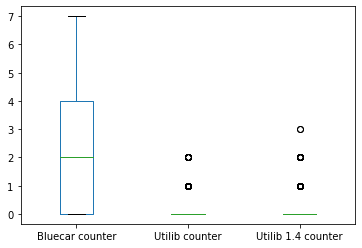

In [17]:
#data validity
#using boxplots to test for outliers
car_service.boxplot(['Bluecar counter','Utilib counter','Utilib 1.4 counter'], grid = False)

In [18]:
#check for duplicates
#if there be, then drop
car_service.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [19]:
#drop duplicates
car_service = car_service.drop_duplicates()

In [20]:
#now check the shape
car_service.shape

(5000, 25)

  **uniformity**

*   drop irrelevant columns
*   strip white spaces
*   fix columns
*   






In [21]:
#drop columns
columns_to_drop = ['Address', 'Cars', 'Displayed comment', 'ID', 'Geo point', 'Charge Slots',\
                         'Charging Status', 'Rental status', 'Scheduled at', 'Slots', 'Station type', \
                         'Subscription status', 'year', 'month', 'day', 'minute']
car_service.drop(columns_to_drop, axis=1, inplace=True)

In [22]:
#confirm if dropped
car_service

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Status,hour
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,ok,11
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,ok,7
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,ok,20
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,ok,4
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,ok,17
...,...,...,...,...,...,...,...,...,...
4995,2,0,0,Colombes,STATION,92700,Colombes/MÃ©nelotte/8,ok,11
4996,4,0,0,Paris,STATION,75015,Paris/Dantzig/37,ok,16
4997,1,0,0,Paris,STATION,75007,Paris/Bac/142,ok,7
4998,2,0,0,Fontenay-Sous-Bois,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,ok,17


In [23]:
#change case
#strip white spaces
#rename uniformly
car_service.columns = car_service.columns.str.lower().str.strip().str.replace(' ','_').str.replace('.','')
car_service.head(2)

,bluecar_counter,utilib_counter,utilib_14_counter,city,kind,postal_code,public_name,status,hour
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,ok,11
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,ok,7


**Car usage criteria**

*   +ve means a car was returned
*   -ve means a car was picked
*  0 means a car was neither picked nor returned






In [24]:
#create columns for usage
#bluecar usage
car_service['bluecar_use'] = car_service.bluecar_counter.diff()

#utilib usage
car_service['utilib_use'] = car_service.utilib_counter.diff()

#utilib14 usage
car_service['utilib_14_use'] = car_service.utilib_14_counter.diff()


In [25]:
#check new columns
car_service.head()

,bluecar_counter,utilib_counter,utilib_14_counter,city,kind,postal_code,public_name,status,hour,bluecar_use,utilib_use,utilib_14_use
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,ok,11,NaN,NaN,NaN
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,ok,7,6.0,0.0,0.0
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,ok,20,-3.0,0.0,2.0
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,ok,4,0.0,1.0,-2.0
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,ok,17,0.0,-1.0,0.0


**Research Question**




Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

In [48]:

popular_hour = car_service[(car_service.city == 'Paris') & (car_service.bluecar_use < 0)].groupby('hour')['hour']
popular_hour = popular_hour.count().sort_values(ascending = False)
popular_hour.head(1)

hour
21    80
Name: hour, dtype: int64

**Bonus Questions**

In [49]:
#What is the most popular hour for returning cars?
popular_return_hour = car_service[(car_service.city == 'Paris') & (car_service.bluecar_use > 0)].groupby('hour')['hour']
popular_return_hour = popular_return_hour.count().sort_values(ascending = False)
popular_return_hour.head(1)

hour
3    49
Name: hour, dtype: int64

In [28]:
#What station is the most popular?
#Overall?
#At the most popular picking hour?

#
#popular station overall
pop_station = car_service[(car_service.kind == 'STATION') & (car_service.status == 'ok')].groupby('public_name')['kind']
pop_station = pop_station.count().sort_values(ascending = False)
pop_station.head(1)

public_name
Paris/Porte de Montrouge/8    13
Name: kind, dtype: int64

In [29]:
#most popular station
#at the most popular picking hour
pop_st_hr = car_service[(car_service.kind == 'STATION') & (car_service.bluecar_use < 0)].groupby('public_name')['kind']
pop_st_hr = pop_st_hr.count().sort_values(ascending = False)
pop_st_hr.head(1)

public_name
Paris/Bernardins/23    7
Name: kind, dtype: int64

In [42]:
#What postal code is the most popular for picking up Blue cars?
# Does the most popular station belong to that postal code?
#Overall?
#At the most popular picking hour?

#popular postal code overall
pop_code = car_service[(car_service.status == 'ok') & (car_service.kind == 'STATION')].groupby('public_name')['kind']
pop_code = pop_code.count().sort_values( ascending = False)
pop_code.head(1)


public_name
Paris/Porte de Montrouge/8    13
Name: kind, dtype: int64

In [40]:
#popular postal code
#at the most popular picking hour
pop_code = car_service[(car_service.bluecar_use < 0) & (car_service.kind == 'STATION')].groupby('public_name')['postal_code']
pop_code = pop_code.count().sort_values(ascending = False)
pop_code.head(1)

public_name
Paris/Bernardins/23    7
Name: postal_code, dtype: int64

**Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? **

now use utilib and utilib 1.4

for utilib:

In [50]:
#Identify the most popular hour of the day for picking up a shared utilib
#  in the city of Paris over the month of April 2018.

popular_hour = car_service[(car_service.city == 'Paris') & (car_service.utilib_use < 0)].groupby('hour')['hour']
popular_hour = popular_hour.count().sort_values(ascending = False)
popular_hour.head(1)

hour
19    12
Name: hour, dtype: int64

In [51]:
#What is the most popular hour for returning utilibs?
popular_return_hour = car_service[(car_service.city == 'Paris') & (car_service.utilib_use > 0)].groupby('hour')['hour']
popular_return_hour = popular_return_hour.count().sort_values(ascending = False)
popular_return_hour.head(1)

hour
6    12
Name: hour, dtype: int64

In [52]:
#What station is the most popular?
#Overall?
#At the most popular picking hour?

#
#popular station overall
pop_station = car_service[(car_service.kind == 'STATION') & (car_service.status == 'ok')].groupby('public_name')['kind']
pop_station = pop_station.count().sort_values(ascending = False)
pop_station.head(1)

public_name
Paris/Porte de Montrouge/8    13
Name: kind, dtype: int64

In [53]:
#most popular station
#at the most popular picking hour
pop_st_hr = car_service[(car_service.kind == 'STATION') & (car_service.utilib_use < 0)].groupby('public_name')['kind']
pop_st_hr = pop_st_hr.count().sort_values(ascending = False)
pop_st_hr.head(1)

public_name
Villeneuve-la-Garenne/Verdun/30    2
Name: kind, dtype: int64

In [54]:
#What postal code is the most popular for picking up Blue cars?
# Does the most popular station belong to that postal code?
#Overall?
#At the most popular picking hour?

#pop postal code overall
pop_code = car_service[(car_service.status == 'ok') & (car_service.kind == 'STATION')].groupby('public_name')['kind']
pop_code = pop_code.count().sort_values( ascending = False)
pop_code.head(1)

public_name
Paris/Porte de Montrouge/8    13
Name: kind, dtype: int64

In [55]:
#popular postal ccode at the most popular picking hour
pop_code = car_service[(car_service.utilib_use < 0) & (car_service.kind == 'STATION')].groupby('public_name')['postal_code']
pop_code = pop_code.count().sort_values(ascending = False)
pop_code.head(1)

public_name
Villeneuve-la-Garenne/Verdun/30    2
Name: postal_code, dtype: int64

using utilib 1.4

In [56]:
#Identify the most popular hour of the day for picking up a shared utilib
#  in the city of Paris over the month of April 2018.

popular_hour = car_service[(car_service.city == 'Paris') & (car_service.utilib_14_use < 0)].groupby('hour')['hour']
popular_hour = popular_hour.count().sort_values(ascending = False)
popular_hour.head(1)

hour
3    20
Name: hour, dtype: int64

In [57]:
#What is the most popular hour for returning utilibs?
popular_return_hour = car_service[(car_service.city == 'Paris') & (car_service.utilib_14_use > 0)].groupby('hour')['hour']
popular_return_hour = popular_return_hour.count().sort_values(ascending = False)
popular_return_hour.head(1)

hour
9    17
Name: hour, dtype: int64

In [58]:
#What station is the most popular?
#Overall?
#At the most popular picking hour?

#
#popular station overall
pop_station = car_service[(car_service.kind == 'STATION') & (car_service.status == 'ok')].groupby('public_name')['kind']
pop_station = pop_station.count().sort_values(ascending = False)
pop_station.head(1)

public_name
Paris/Porte de Montrouge/8    13
Name: kind, dtype: int64

In [59]:
#most popular station
#at the most popular picking hour
pop_st_hr = car_service[(car_service.kind == 'STATION') & (car_service.utilib_14_use < 0)].groupby('public_name')['kind']
pop_st_hr = pop_st_hr.count().sort_values(ascending = False)
pop_st_hr.head(1)

public_name
Issy-les-Moulineaux/Gallieni/59    3
Name: kind, dtype: int64

In [60]:
#What postal code is the most popular for picking up utilib_14_cars?
# Does the most popular station belong to that postal code?
#Overall?
#At the most popular picking hour?

#pop postal code overall
pop_code = car_service[(car_service.status == 'ok') & (car_service.kind == 'STATION')].groupby('public_name')['kind']
pop_code = pop_code.count().sort_values( ascending = False)
pop_code.head(1)

public_name
Paris/Porte de Montrouge/8    13
Name: kind, dtype: int64

In [61]:
#popular postal code
#at picking hour
pop_code = car_service[(car_service.utilib_14_use < 0) & (car_service.kind == 'STATION')].groupby('public_name')['postal_code']
pop_code = pop_code.count().sort_values(ascending = False)
pop_code.head(1)

public_name
Issy-les-Moulineaux/Gallieni/59    3
Name: postal_code, dtype: int64